In [1]:
import matplotlib.pyplot as plt
import seaborn
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from ignition_common import *

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)    # REGIONS WITH TUMOR
sub-CON01       2100.0          none                           0.0             0              
sub-CON02       2100.0          none                           0.0             0              
sub-CON03       2100.0          none                           0.0             0              
sub-CON04       2100.0          none                           0.0             0              
sub-CON05       2400.0          none                           0.0             0              
sub-CON06       2400.0          none                           0.0             0              
sub-CON07       2400.0          none                           0.0             0              
sub-CON08       2400.0          none                           0.0             0              
sub-CON09       2400.0          none                           0.0        

Bin delta ignition for all patients between tumor and non-tumor regions

In [3]:
tumor_region_bin = []
non_tumor_region_bin = []

for k, s in tumor_subset.items():
    for i in range(68):
        if s.tumor_regions.is_tumor_region_by_id(i):
            tumor_region_bin.append(tumor_subjects_delta_ignitions[k][i])
        else:
            non_tumor_region_bin.append(tumor_subjects_delta_ignitions[k][i])

Let's plot this bins

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions (#126) vs. Non Tumor Regions (#1574): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.820e-05 U_stat=7.822e+04


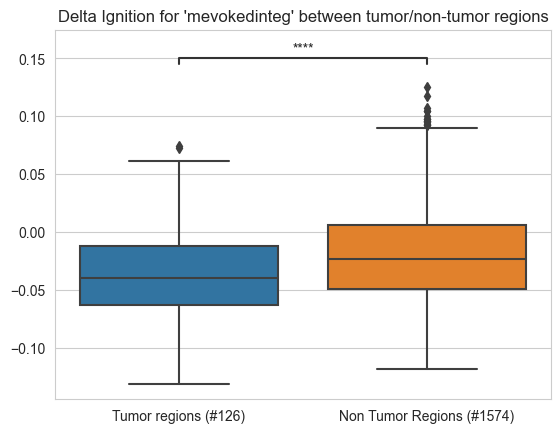

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions (#126) vs. Non Tumor Regions (#1574): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.769e-03 U_stat=8.526e+04


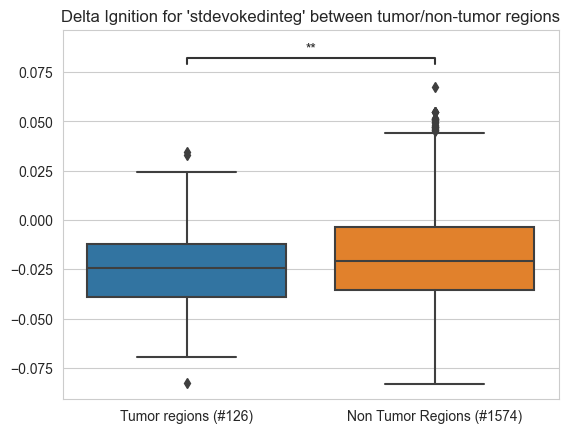

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Tumor regions (#126) vs. Non Tumor Regions (#1574): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.187e-01 U_stat=9.089e+04


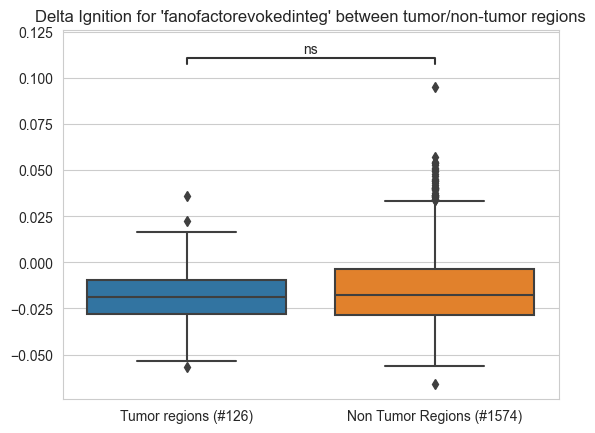

In [4]:
if True:
    tumor_regions = [r['mevokedinteg'] for r in tumor_region_bin]
    non_tumor_regions = [r['mevokedinteg'] for r in non_tumor_region_bin]

    plotComparisonAcrossLabels2(
        {
            'Tumor regions (#'+str(len(tumor_regions))+')': tumor_regions,
            'Non Tumor Regions (#'+str(len(non_tumor_regions))+')': non_tumor_regions,
        },
        graphLabel="Delta Ignition for 'mevokedinteg' between tumor/non-tumor regions"
    )

if True:
    tumor_regions = [r['stdevokedinteg'] for r in tumor_region_bin]
    non_tumor_regions = [r['stdevokedinteg'] for r in non_tumor_region_bin]

    plotComparisonAcrossLabels2(
        {
            'Tumor regions (#'+str(len(tumor_regions))+')': tumor_regions,
            'Non Tumor Regions (#'+str(len(non_tumor_regions))+')': non_tumor_regions,
        },
        graphLabel="Delta Ignition for 'stdevokedinteg' between tumor/non-tumor regions"
    )

if True:
    tumor_regions = [r['fanofactorevokedinteg'] for r in tumor_region_bin]
    non_tumor_regions = [r['fanofactorevokedinteg'] for r in non_tumor_region_bin]

    plotComparisonAcrossLabels2(
        {
            'Tumor regions (#'+str(len(tumor_regions))+')': tumor_regions,
            'Non Tumor Regions (#'+str(len(non_tumor_regions))+')': non_tumor_regions,
        },
        graphLabel="Delta Ignition for 'fanofactorevokedinteg' between tumor/non-tumor regions"
    )

Let's visualize how delta 'mevokedinteg' is distributed between tumor/non-tumor regions from patients

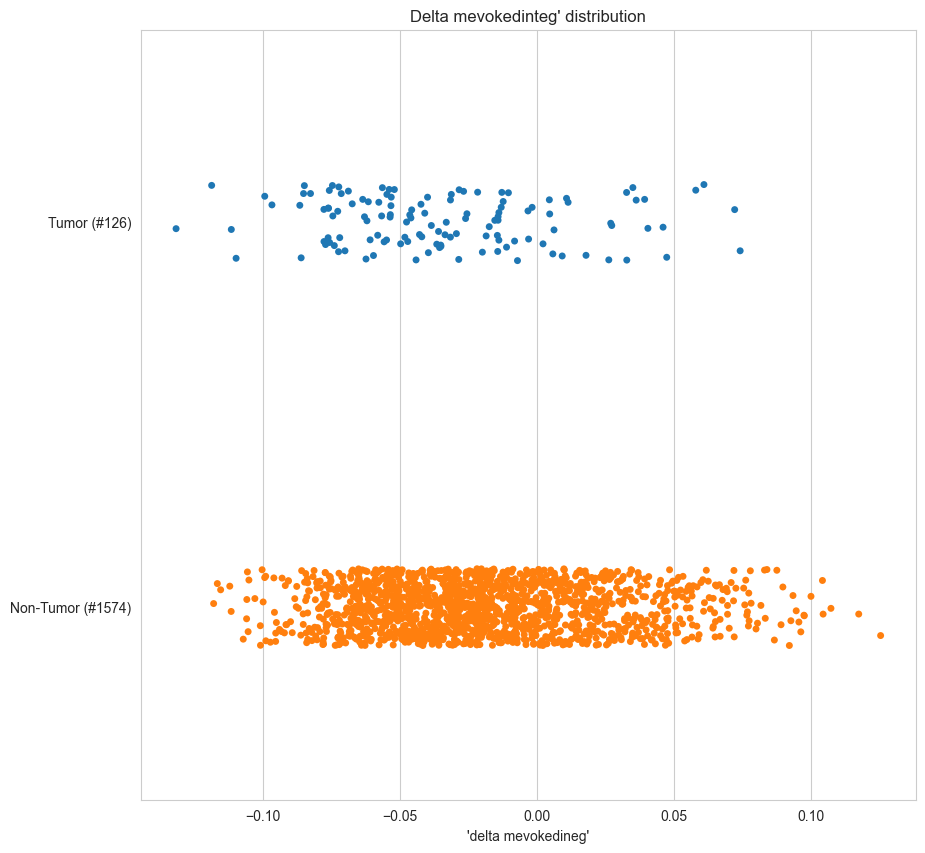

In [5]:
if True:
    tumor = [r['mevokedinteg'] for r in tumor_region_bin]
    non_tumor = [r['mevokedinteg'] for r in non_tumor_region_bin]

    plt.figure(figsize=(10, 10))
    seaborn.stripplot(
        data={
            'Tumor (#'+str(len(tumor))+')': tumor,
            'Non-Tumor (#'+str(len(non_tumor))+')': non_tumor
        },
        orient='h',
    )
    plt.xlabel("'delta mevokedineg'")
    plt.title("Delta mevokedinteg' distribution")
    plt.show()

Graph tumor regions:
- Delta Ignitions vs Tumor Volume Percentage
- Abs(Delta Ignitions) vs Tumor Volume Percentage

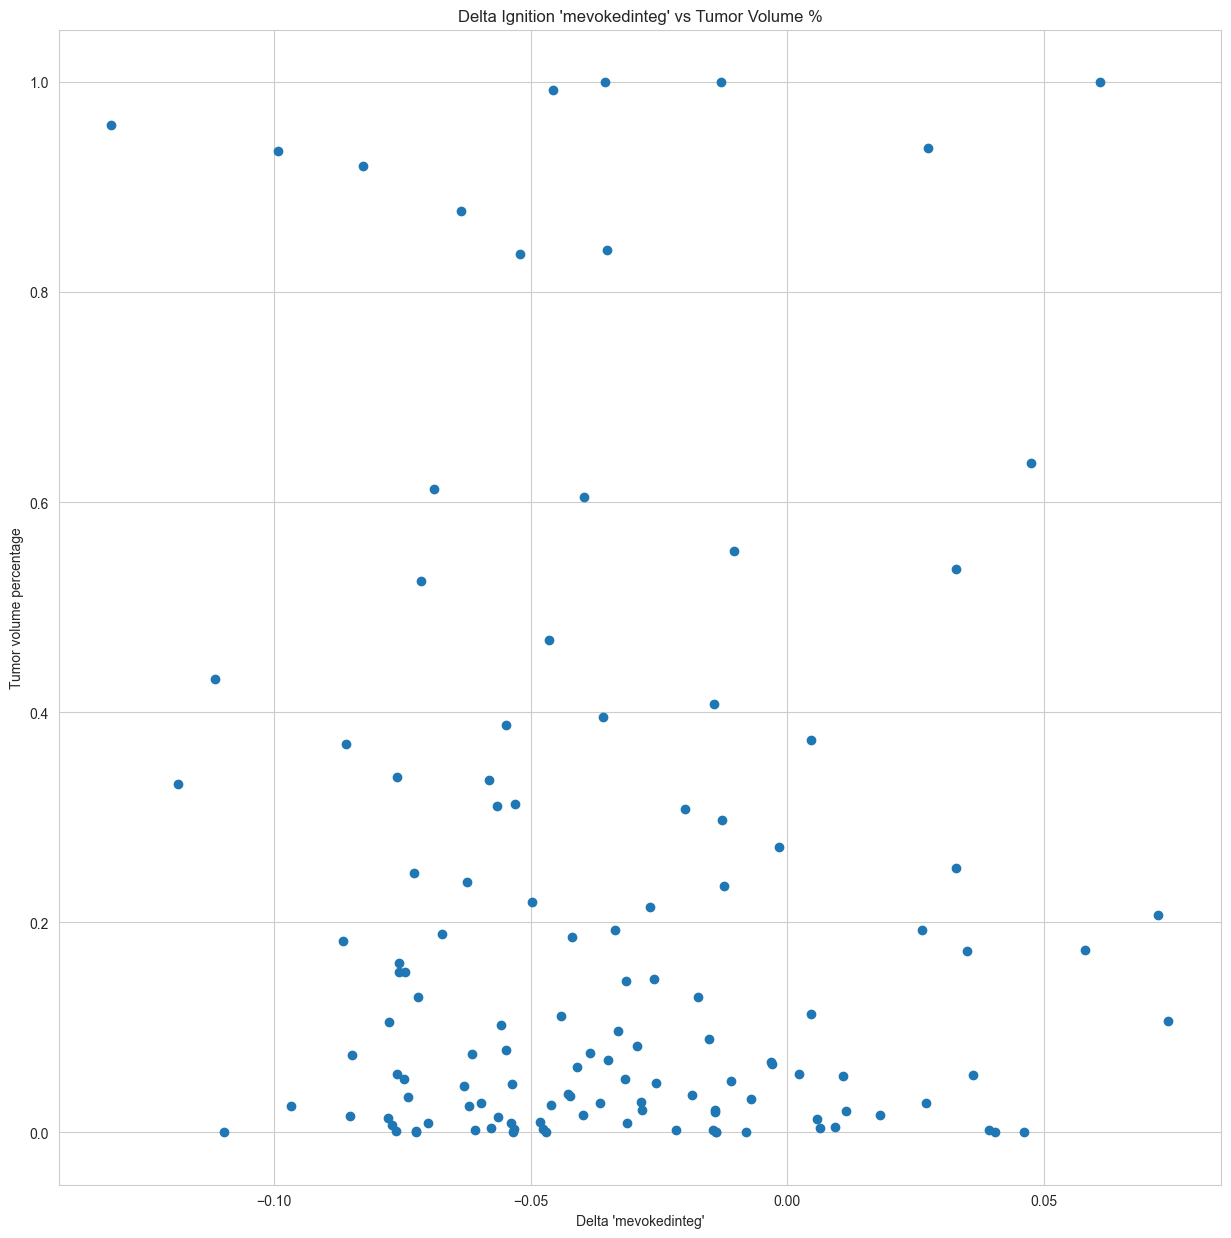

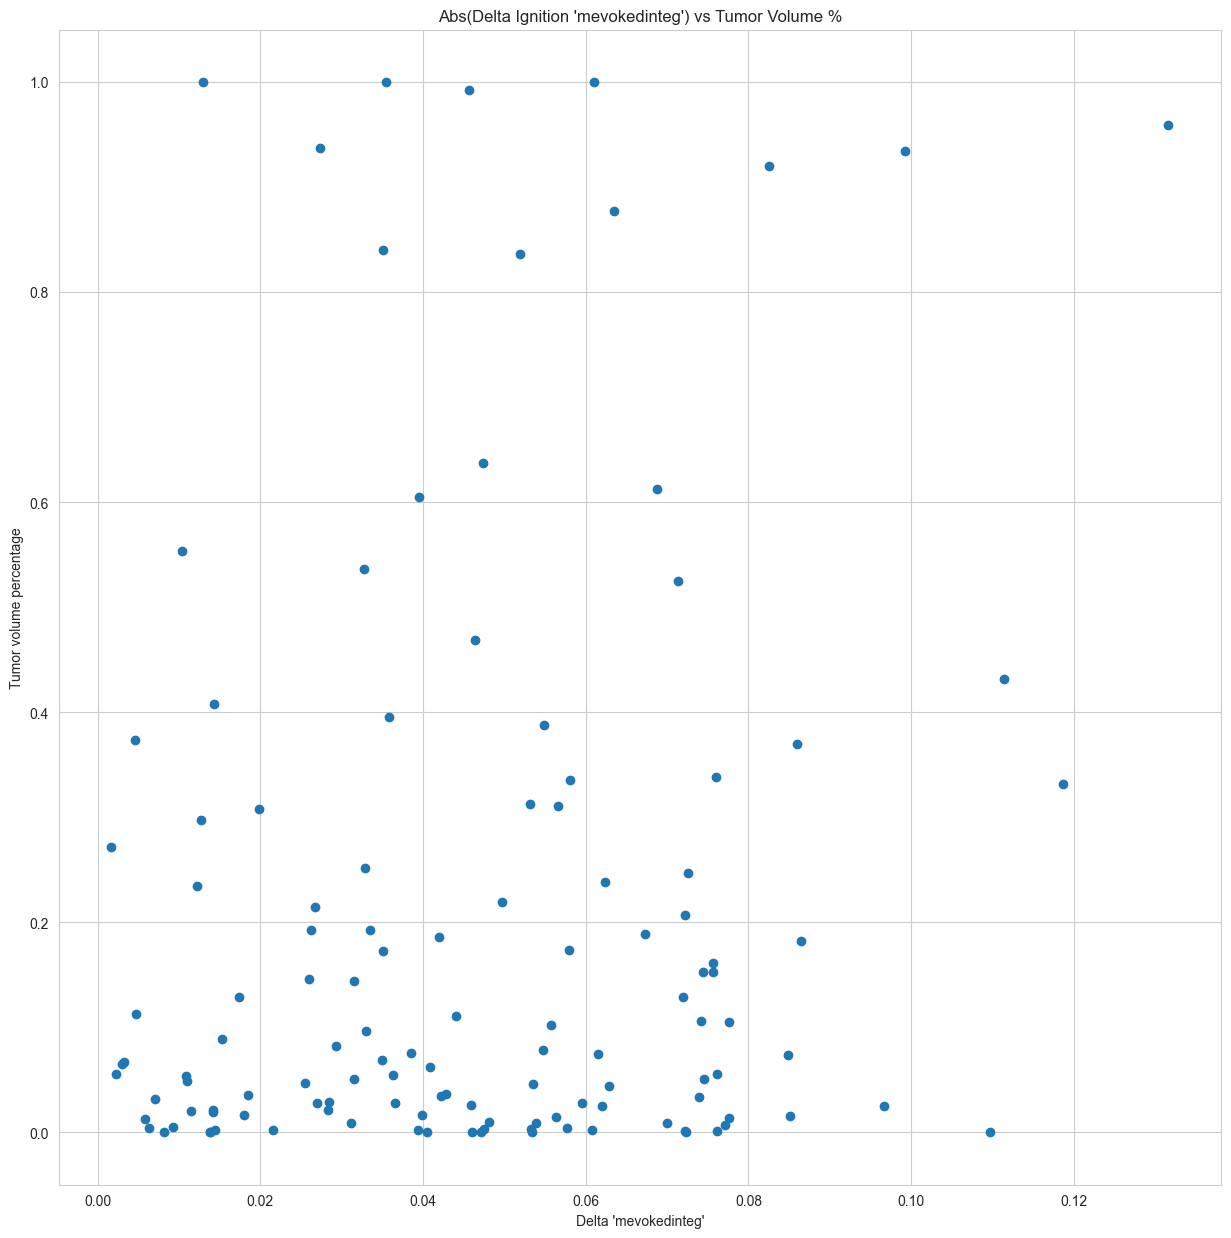

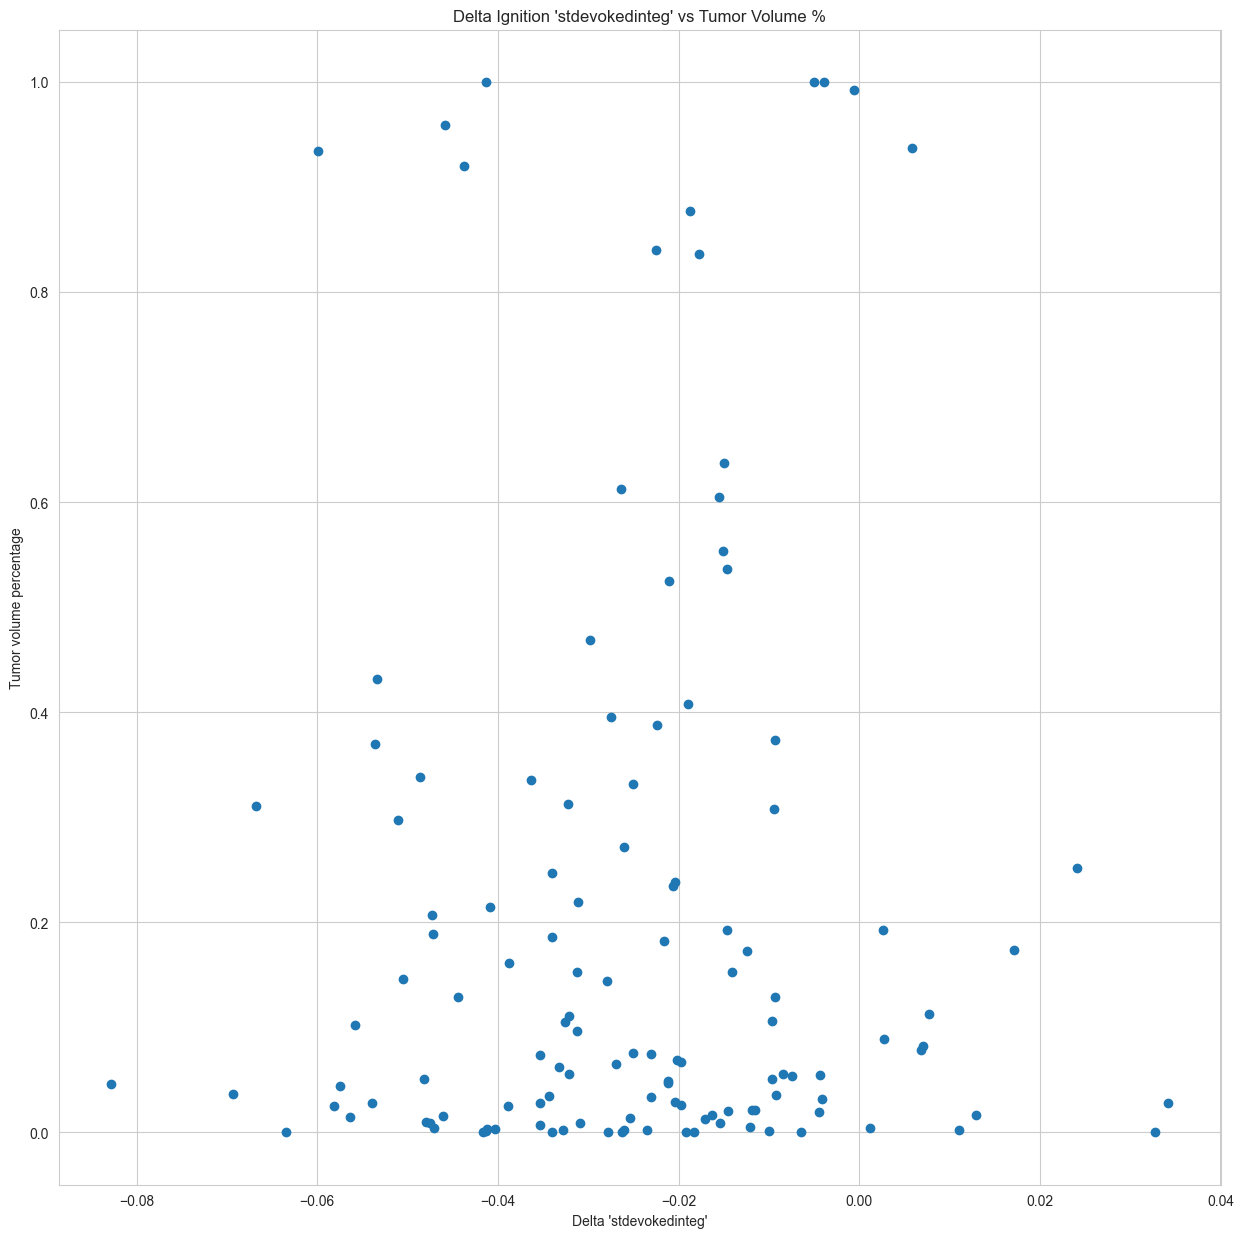

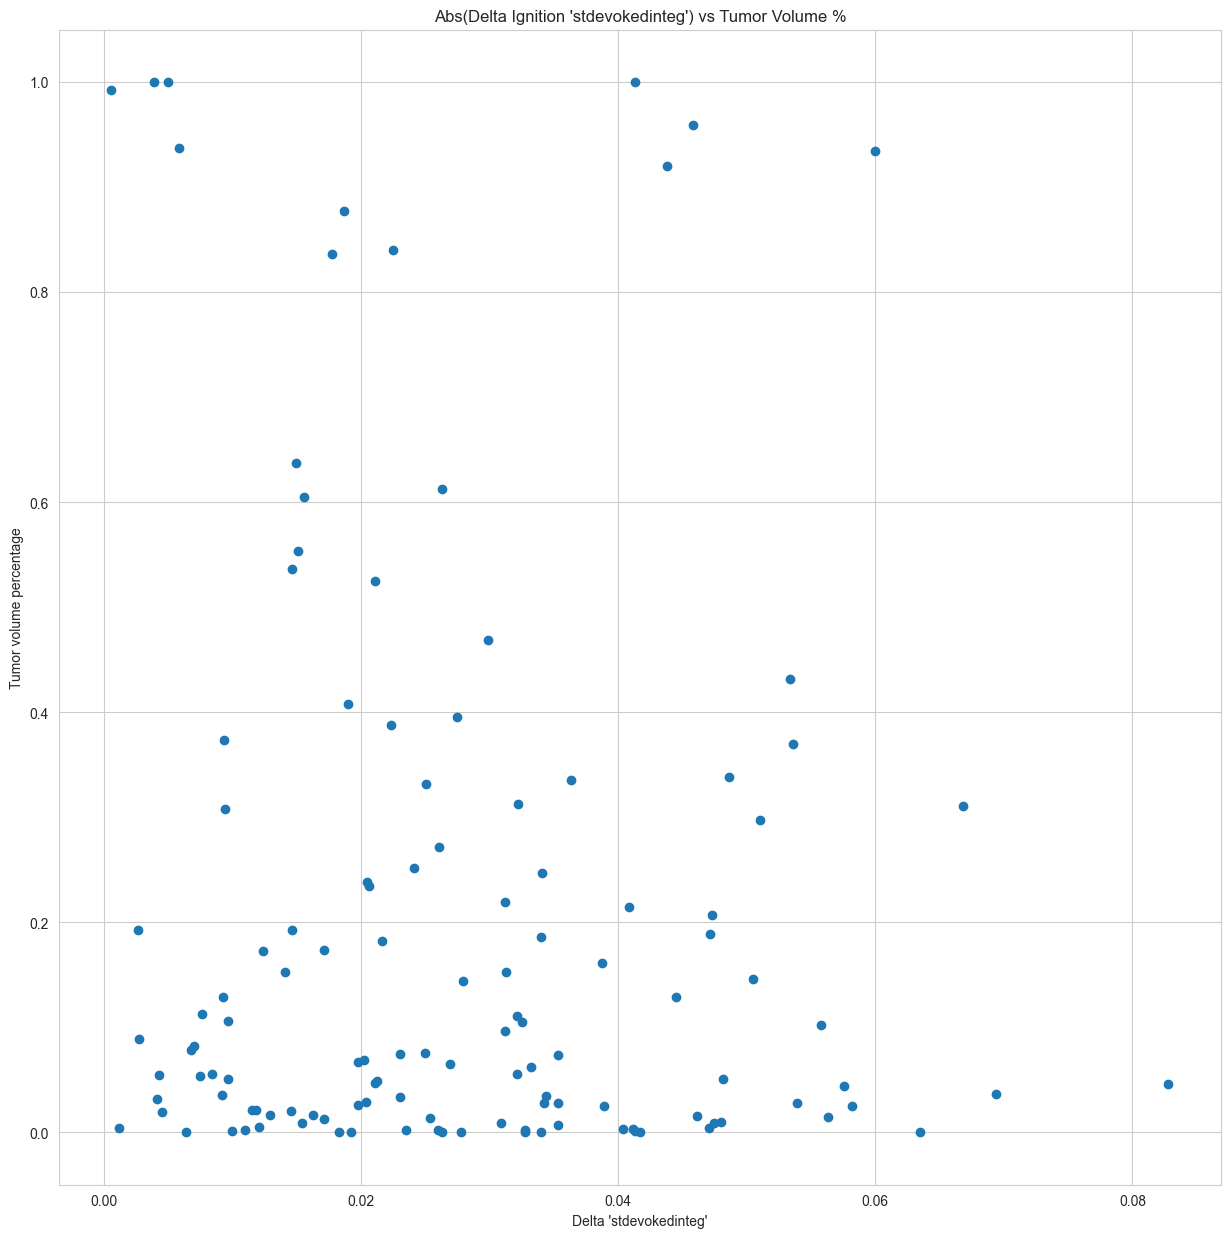

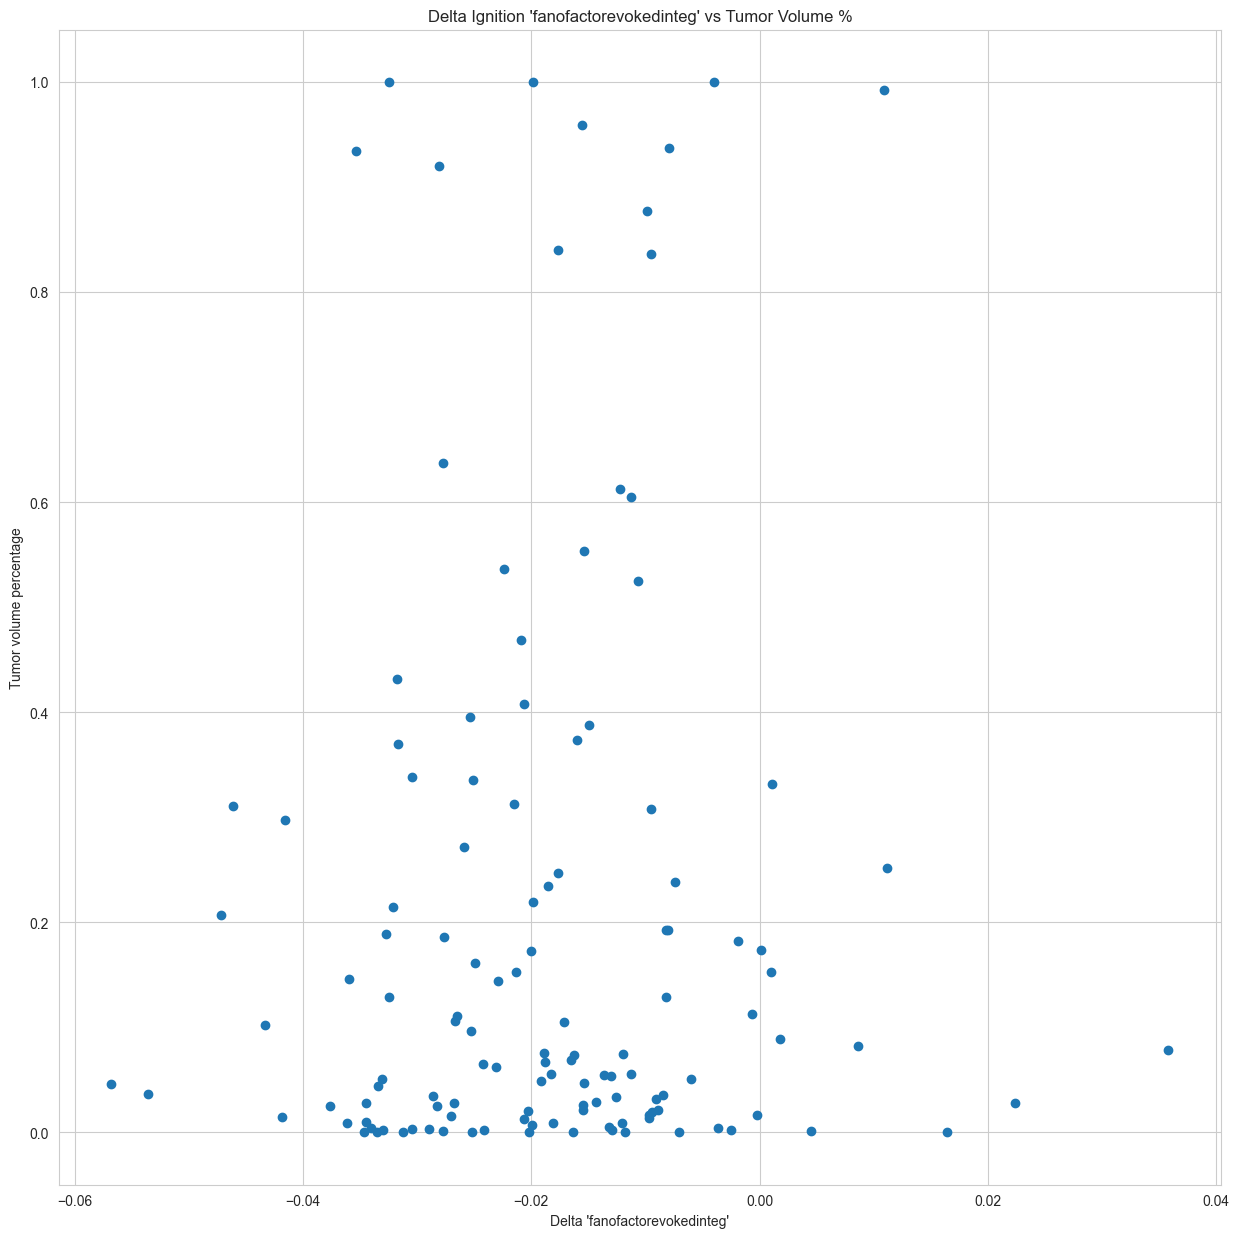

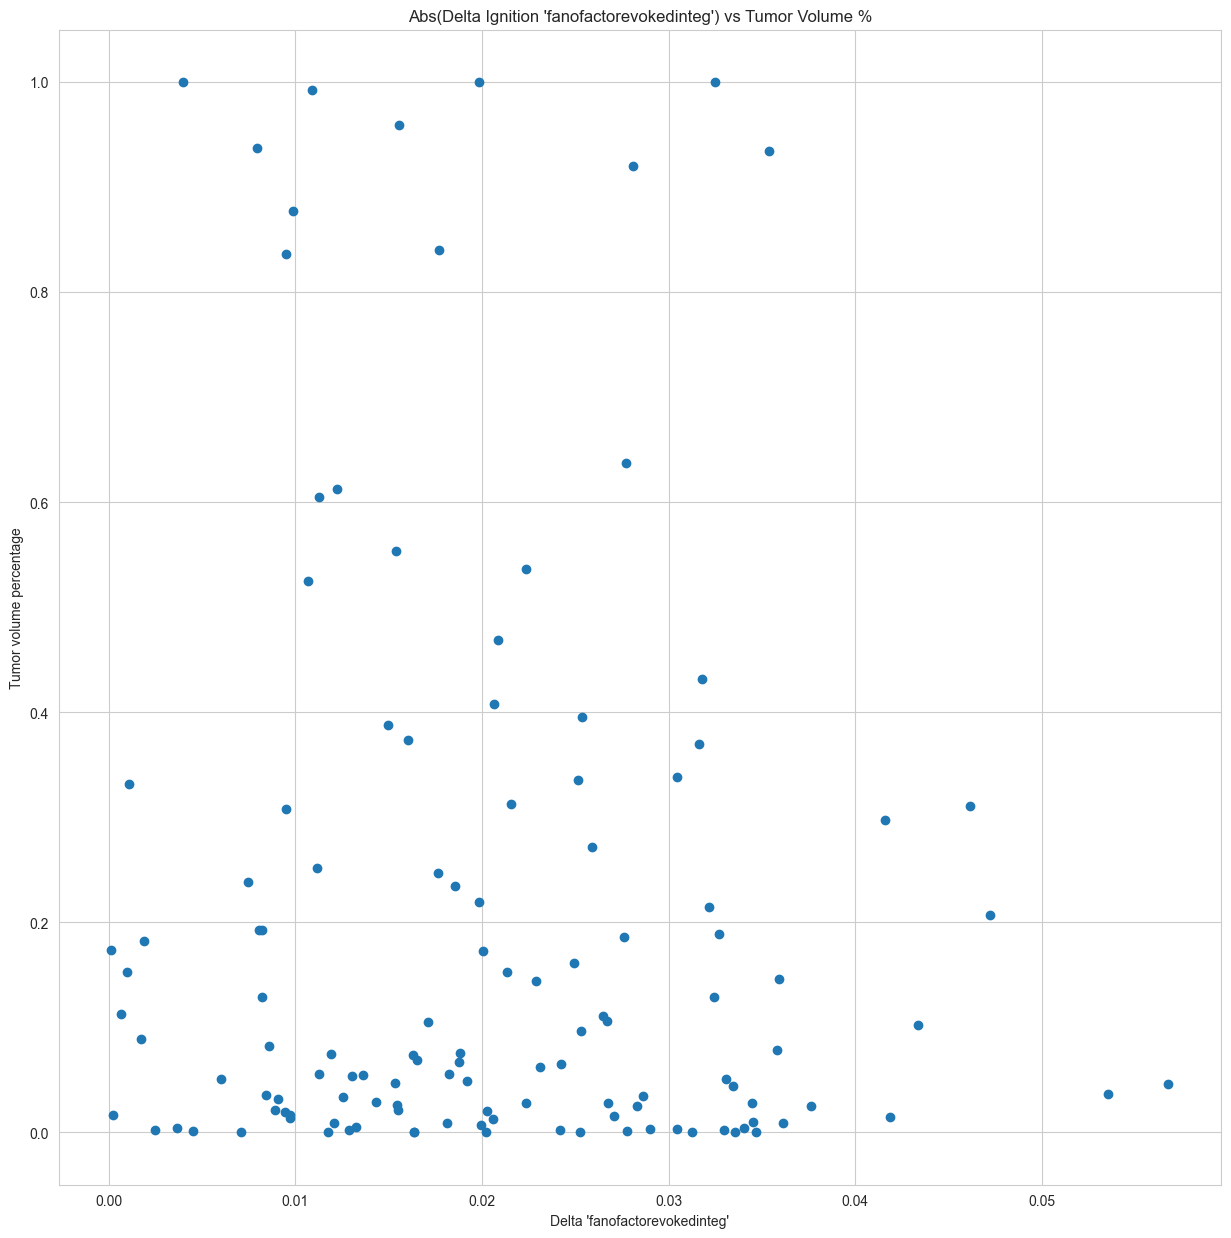

In [6]:
if True:
    x_delta_mevokedinteg = []
    x_delta_stdevokedinteg = []
    x_delta_fanofactorevokedinteg = []
    y = []
    for k, s in tumor_subset.items():
        for i in range(68):
            if s.tumor_regions.is_tumor_region_by_id(i):
                x_delta_mevokedinteg.append(tumor_subjects_delta_ignitions[k][i]['mevokedinteg'])
                x_delta_stdevokedinteg.append(tumor_subjects_delta_ignitions[k][i]['stdevokedinteg'])
                x_delta_fanofactorevokedinteg.append(tumor_subjects_delta_ignitions[k][i]['fanofactorevokedinteg'])
                y.append(s.tumor_regions.get_tumor_volume_percentage_by_id(i))

    plt.figure(figsize=(15, 15))
    plt.plot(x_delta_mevokedinteg, y, 'o')
    plt.xlabel("Delta 'mevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Delta Ignition 'mevokedinteg' vs Tumor Volume %")
    plt.show()

    plt.figure(figsize=(15, 15))
    plt.plot([abs(i) for i in x_delta_mevokedinteg], y, 'o')
    plt.xlabel("Delta 'mevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Abs(Delta Ignition 'mevokedinteg') vs Tumor Volume %")
    plt.show()

    plt.figure(figsize=(15, 15))
    plt.plot(x_delta_stdevokedinteg, y, 'o')
    plt.xlabel("Delta 'stdevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Delta Ignition 'stdevokedinteg' vs Tumor Volume %")
    plt.show()

    plt.figure(figsize=(15, 15))
    plt.plot([abs(i) for i in x_delta_stdevokedinteg], y, 'o')
    plt.xlabel("Delta 'stdevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Abs(Delta Ignition 'stdevokedinteg') vs Tumor Volume %")
    plt.show()

    plt.figure(figsize=(15, 15))
    plt.plot(x_delta_fanofactorevokedinteg, y, 'o')
    plt.xlabel("Delta 'fanofactorevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Delta Ignition 'fanofactorevokedinteg' vs Tumor Volume %")
    plt.show()

    plt.figure(figsize=(15, 15))
    plt.plot([abs(i) for i in x_delta_fanofactorevokedinteg], y, 'o')
    plt.xlabel("Delta 'fanofactorevokedinteg'")
    plt.ylabel("Tumor volume percentage")
    plt.title("Abs(Delta Ignition 'fanofactorevokedinteg') vs Tumor Volume %")
    plt.show()


Let's see the correlation between mean delta ignition between all regions and total tumor volume

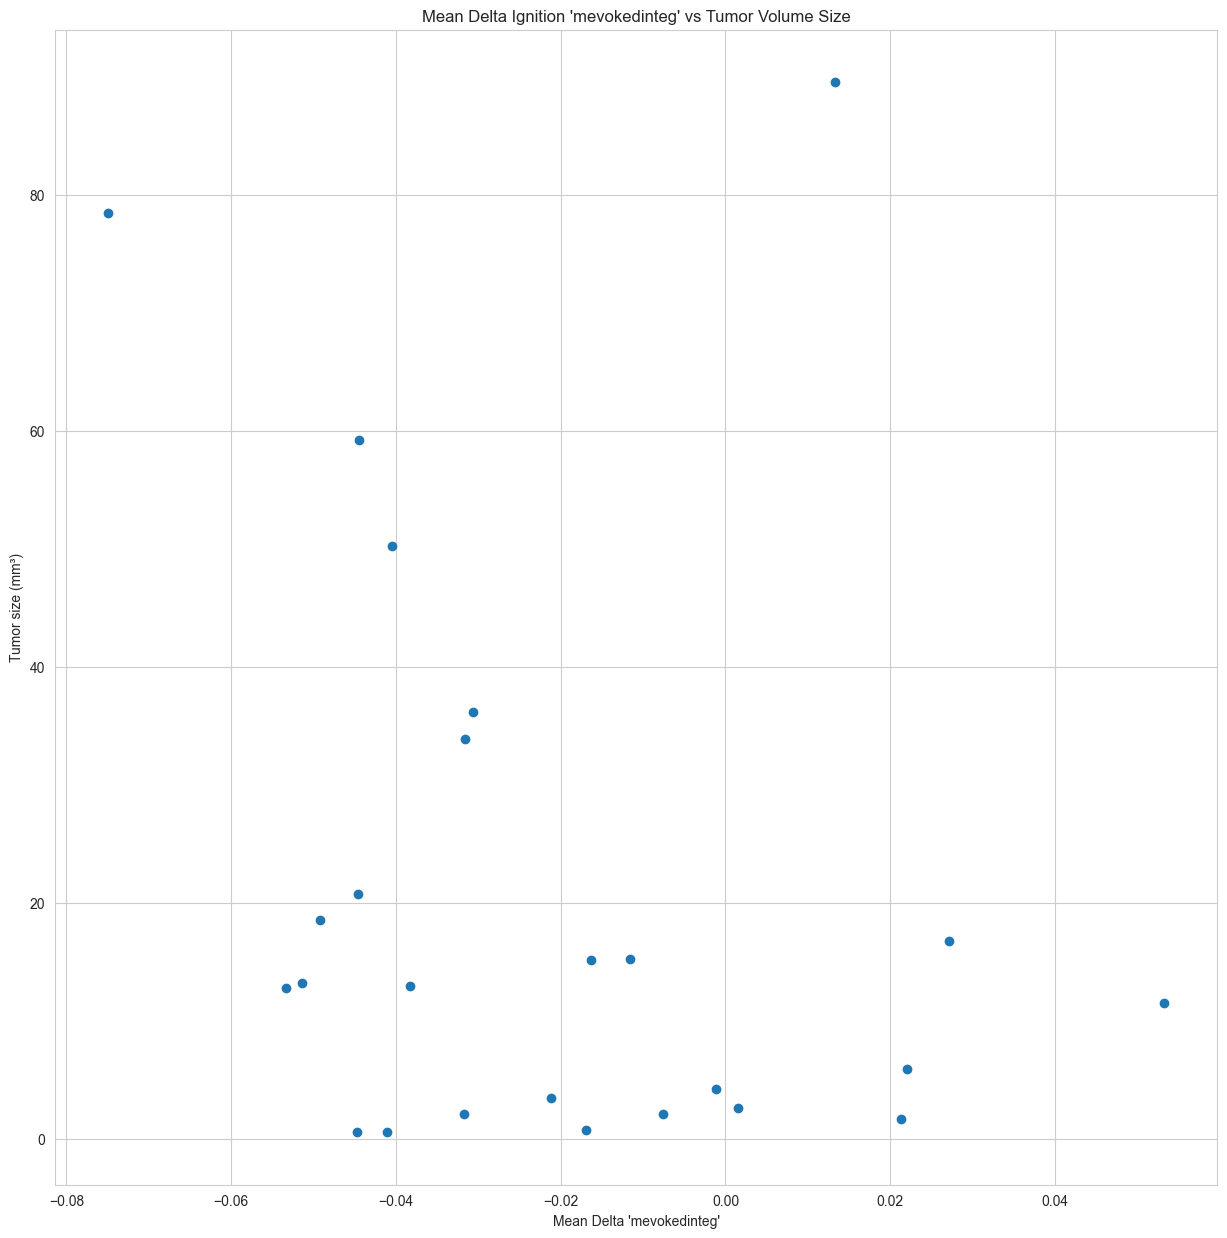

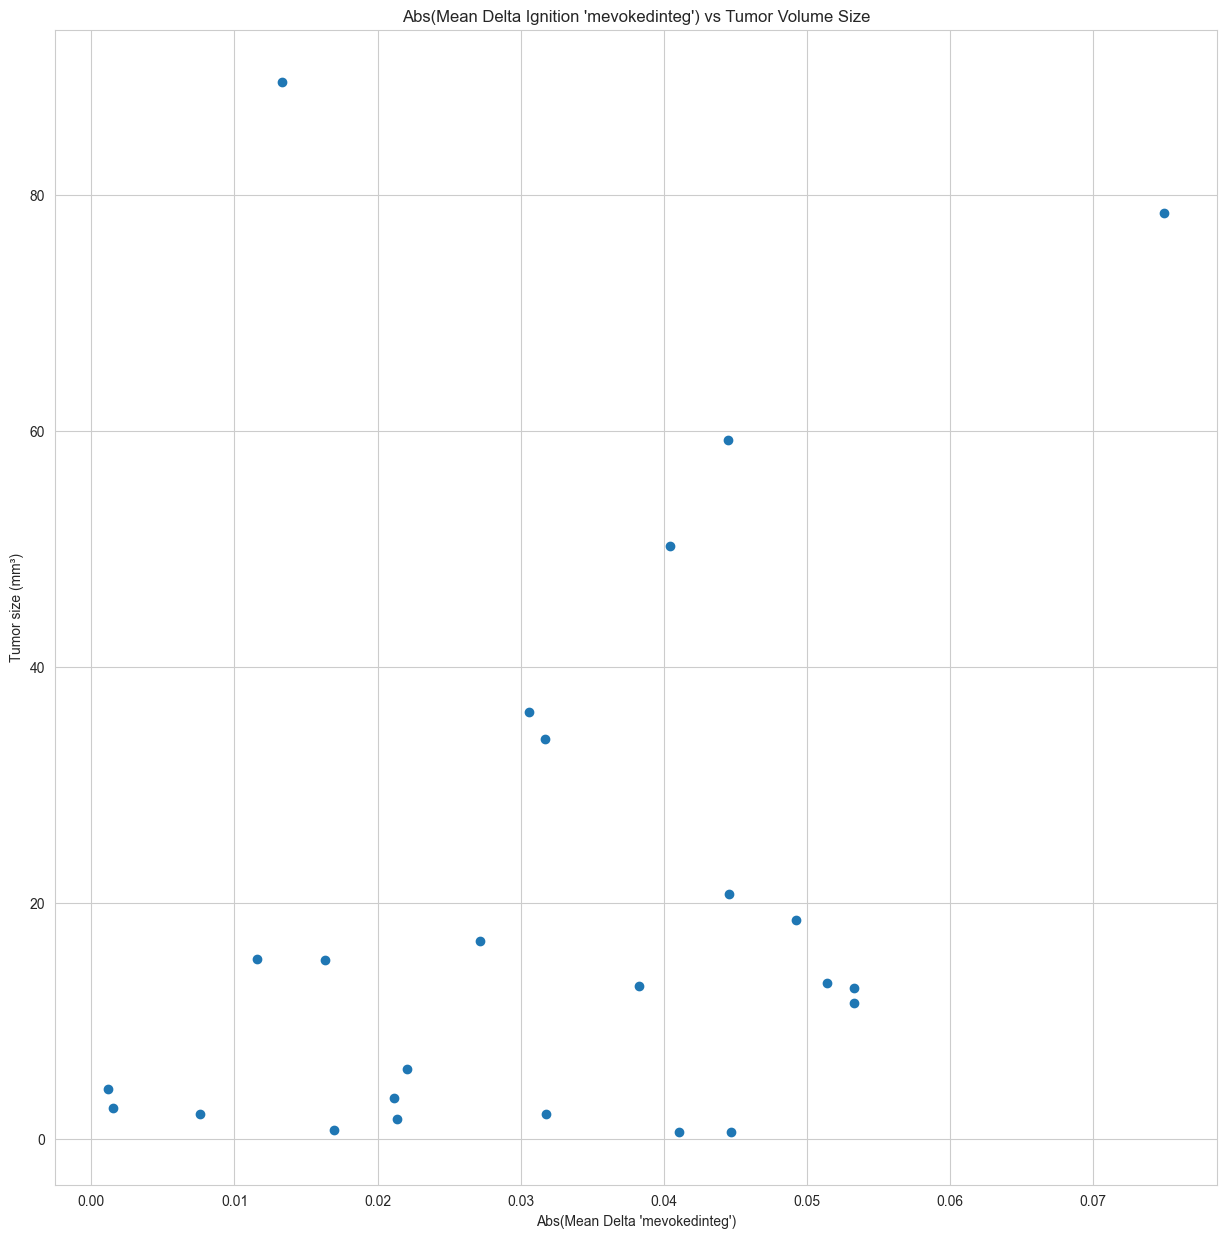

In [7]:
if True:
    mean_delta_ignition = []
    total_tumor_volume = []
    for k, s in tumor_subset.items():
        mean_delta_ignition.append(
            np.mean([tumor_subjects_delta_ignitions[k][i]['mevokedinteg'] for i in range(68)])
        )
        total_tumor_volume.append(
            s.get_tumor_size()
        )

    plt.figure(figsize=(15, 15))
    plt.plot(mean_delta_ignition, total_tumor_volume, 'o')
    plt.xlabel("Mean Delta 'mevokedinteg'")
    plt.ylabel("Tumor size (mm³)")
    plt.title("Mean Delta Ignition 'mevokedinteg' vs Tumor Volume Size")
    plt.show()

    plt.figure(figsize=(15, 15))
    plt.plot(np.abs(mean_delta_ignition), total_tumor_volume, 'o')
    plt.xlabel("Abs(Mean Delta 'mevokedinteg')")
    plt.ylabel("Tumor size (mm³)")
    plt.title("Abs(Mean Delta Ignition 'mevokedinteg') vs Tumor Volume Size")
    plt.show()